In [47]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

In [49]:
print(os.getcwd())

/Users/santiagoaristizabal/Desktop/HackatonAi2026


In [50]:
path_consumos = "dataset/consumos_uptc.csv"
path_sedes = "dataset/sedes_uptc.csv"

df_consumos = pd.read_csv(path_consumos)
df_consumos


,reading_id,timestamp,sede,sede_id,energia_total_kwh,energia_comedor_kwh,energia_salones_kwh,energia_laboratorios_kwh,energia_auditorios_kwh,energia_oficinas_kwh,...,dia_nombre,mes,trimestre,año,periodo_academico,es_fin_semana,es_festivo,es_semana_parciales,es_semana_finales,co2_kg
0,1,2018-01-01 00:00:00,Chiquinquirá,UPTC_CHI,0.928,0.0452,0.1497,0.4334,0.0386,0.2613,...,Lunes,1,1,2018,vacaciones_fin,False,True,False,False,0.1877
1,2,2018-01-01 00:00:00,Duitama,UPTC_DUI,2.592,0.1129,0.2007,1.7993,0.0573,0.4217,...,Lunes,1,1,2018,vacaciones_fin,False,True,False,False,0.4490
2,3,2018-01-01 00:00:00,Sogamoso,UPTC_SOG,2.841,0.1395,0.2388,1.9638,NaN,0.4443,...,Lunes,1,1,2018,vacaciones_fin,False,True,False,False,0.6048
3,4,2018-01-01 00:00:00,Tunja,UPTC_TUN,1.505,0.0892,0.1091,0.9672,0.0364,0.3031,...,Lunes,1,1,2018,vacaciones_fin,False,True,False,False,0.2872
4,5,2018-01-01 01:00:00,Chiquinquirá,UPTC_CHI,0.917,0.0479,0.1432,0.4071,0.0418,0.2766,...,Lunes,1,1,2018,vacaciones_fin,False,True,False,False,0.1599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275382,275383,2025-10-30 23:00:00,Tunja,UPTC_TUN,2.253,0.2312,0.1803,1.3621,0.0506,0.4286,...,Jueves,10,4,2025,semestre_2,False,False,False,False,0.5161
275383,275384,2025-10-31 00:00:00,Chiquinquirá,UPTC_CHI,1.273,0.1362,0.1948,0.5314,0.0551,0.3556,...,Viernes,10,4,2025,semestre_2,False,False,False,False,0.2223
275384,275385,2025-10-31 00:00:00,Duitama,UPTC_DUI,4.159,0.3442,0.3703,2.6320,0.0769,0.7352,...,Viernes,10,4,2025,semestre_2,False,False,False,False,0.7608
275385,275386,2025-10-31 00:00:00,Sogamoso,UPTC_SOG,5.063,0.3924,0.3327,3.5558,0.0821,0.6998,...,Viernes,10,4,2025,semestre_2,False,False,False,False,0.8754


In [51]:
df_sedes = pd.read_csv(path_sedes)
df_sedes

,sede,sede_id,nombre_completo,ciudad,area_m2,num_estudiantes,num_empleados,num_edificios,tiene_residencias,tiene_laboratorios_pesados,altitud_msnm,temp_promedio_c,pct_comedores,pct_salones,pct_laboratorios,pct_auditorios,pct_oficinas
0,Tunja,UPTC_TUN,Sede Central Tunja,Tunja,85000,18000,1200,25,True,True,2820,13,0.12,0.25,0.30,0.08,0.25
1,Duitama,UPTC_DUI,Sede Duitama,Duitama,35000,5500,350,12,False,True,2530,15,0.10,0.28,0.32,0.07,0.23
2,Sogamoso,UPTC_SOG,Sede Sogamoso,Sogamoso,40000,6000,400,14,False,True,2570,14,0.10,0.26,0.35,0.06,0.23
3,Chiquinquirá,UPTC_CHI,Sede Chiquinquirá,Chiquinquirá,15000,2000,150,5,False,False,2580,14,0.08,0.35,0.20,0.10,0.27


In [52]:
missing_info_sedes = df_sedes.isnull().sum()
print("Columnas con datos faltantes:")
print(missing_info_sedes[missing_info_sedes > 0])

Columnas con datos faltantes:
Series([], dtype: int64)


In [53]:
missing_info_consumos = df_consumos.isnull().sum()
print("Columnas con datos faltantes:")
print(missing_info_consumos[missing_info_consumos > 0])

Columnas con datos faltantes:
energia_comedor_kwh        8254
energia_auditorios_kwh    13618
agua_litros               10982
temperatura_exterior_c    16385
ocupacion_pct             32766
co2_kg                    13796
dtype: int64


In [57]:
mismatched = df_full[df_full['nombre_completo'].isnull()]

print("IDs de sede que no cruzaron correctamente:")
print(mismatched['sede_id'].unique())

print("\nNombres de sede que no cruzaron correctamente:")
print(mismatched['sede'].unique())

print("\nIDs que existen en df_sedes:")
print(df_sedes['sede_id'].unique())

IDs de sede que no cruzaron correctamente:
<StringArray>
[]
Length: 0, dtype: str

Nombres de sede que no cruzaron correctamente:
<StringArray>
[]
Length: 0, dtype: str

IDs que existen en df_sedes:
<StringArray>
['UPTC_TUN', 'UPTC_DUI', 'UPTC_SOG', 'UPTC_CHI']
Length: 4, dtype: str


In [58]:
def normalizar_id(text):
    if pd.isna(text): return text
    # Convierte a UPTC_TUN, UPTC_DUI, etc.
    return str(text).upper().replace('-', '_').strip()

df_consumos['sede_id'] = df_consumos['sede_id'].apply(normalizar_id)
df_sedes['sede_id'] = df_sedes['sede_id'].apply(normalizar_id)


df_full = df_consumos.merge(df_sedes, on='sede_id', how='left', suffixes=('', '_drop'))


def clean_periodo(text):
    text = str(text).lower().strip()
    if 'semestre_1' in text or 'semestre1' in text: return 'semestre_1'
    if 'semestre_2' in text: return 'semestre_2'
    if 'vacaciones' in text: return 'vacaciones'
    return text

df_full['periodo_academico'] = df_full['periodo_academico'].apply(clean_periodo)


print(f"Registros sin match de sede: {df_full['nombre_completo'].isnull().sum()}")
print("\nCategorías de periodo académico unificadas:")
print(df_full['periodo_academico'].value_counts())

Registros sin match de sede: 0

Categorías de periodo académico unificadas:
periodo_academico
semestre_1    117460
semestre_2     79522
vacaciones     78405
Name: count, dtype: int64


In [59]:
# Ver missing values reales
missing_info = df_full.isnull().sum()
print("Columnas con datos faltantes:")
print(missing_info[missing_info > 0])

# Ver inconsistencias en periodo_academico (mencionado en el codebook)
print("\nValores únicos en periodo académico:")
print(df_full['periodo_academico'].unique())

Columnas con datos faltantes:
energia_comedor_kwh        8254
energia_auditorios_kwh    13618
agua_litros               10982
temperatura_exterior_c    16385
ocupacion_pct             32766
co2_kg                    13796
dtype: int64

Valores únicos en periodo académico:
<StringArray>
['vacaciones', 'semestre_1', 'semestre_2']
Length: 3, dtype: str


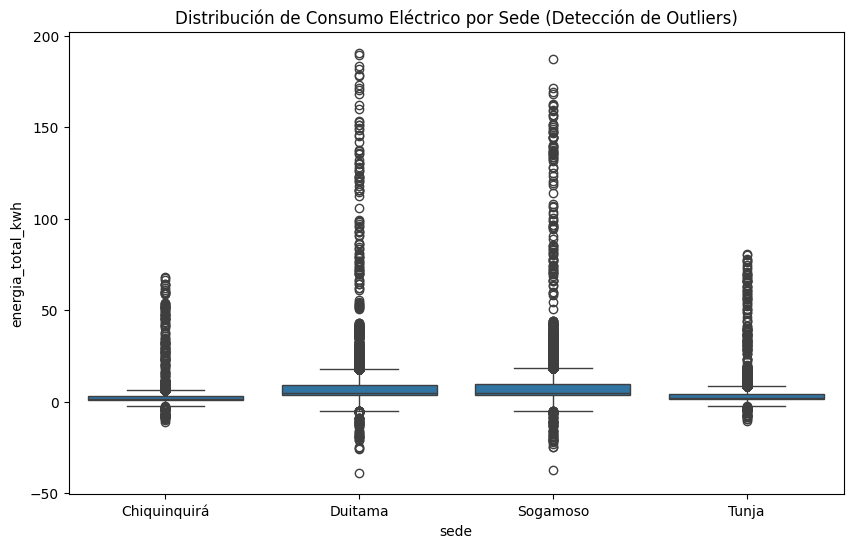

In [60]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_full, x='sede', y='energia_total_kwh')
plt.title('Distribución de Consumo Eléctrico por Sede (Detección de Outliers)')
plt.show()